In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv('musicData.csv')
dataset.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [5]:
print(dataset.isnull().sum())

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64


In [6]:
# to see how many rows contain missing value
mask = dataset.isnull().any(axis=1)
print(mask.sum())

5


In [7]:
bad_rows = dataset[mask]
print("\nMissing-field counts per row:")
print(bad_rows.isnull().sum(axis=1))


Missing-field counts per row:
10000    18
10001    18
10002    18
10003    18
10004    18
dtype: int64


In [8]:
# it means row 10000, 10001, 10002, 10003 and 10004 are completely empty (18/18 columns missing), so i drop the completele empty row
dataset_clean = dataset.dropna(how="all")

In [9]:
print(dataset_clean.isnull().sum())
dataset_clean.info()

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumental

In [10]:
dataset_clean.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [11]:
print(dataset_clean['music_genre'].value_counts())

music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64


In [12]:
# data preprocessing
# make a clean copy of the dataset, because dataset_clean is a slice of dataset
dataset_clean = dataset_clean.copy()
dataset_clean['duration_ms'] = dataset_clean['duration_ms'].apply(lambda x: np.nan if x <= 0 else x)
numeric_feats = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
categorical_feats = ['key', 'mode']
target_col = ['music_genre']
for col in numeric_feats:
    dataset_clean[col] = pd.to_numeric(dataset_clean[col], errors='coerce')
    dataset_clean[col].fillna(dataset_clean[col].median(), inplace=True)
# map musical key
key_order = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
key_map = {k: i for i, k in enumerate(key_order)}
key_map['UNKNOWN'] = -1
dataset_clean['key'] = (dataset_clean['key'].fillna('UNKNOWN').map(key_map))
# fill and one-hot categorical mode features
dataset_clean['is_major'] = (dataset_clean['mode'] == 'Major').astype(int)
dataset_clean.drop(columns=['mode'], inplace=True)
# encode genre labels to integers
le = LabelEncoder()
drop_col = to_drop = ['instance_id','artist_name','track_name','obtained_date']
dataset_clean.drop(columns = drop_col, inplace=True)

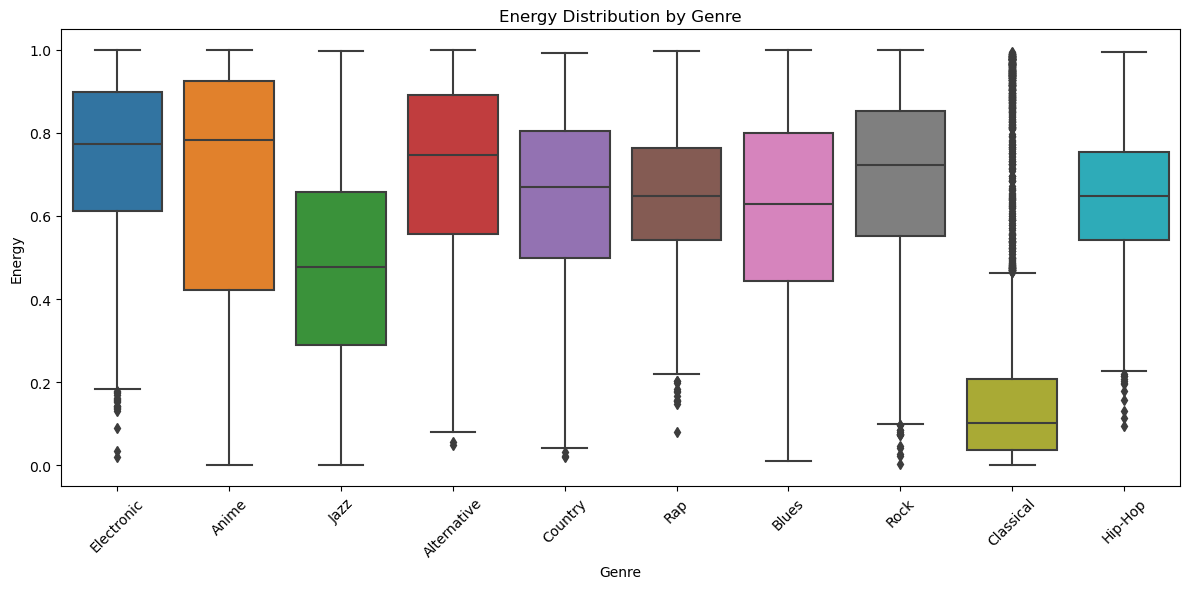

In [13]:
# Boxplot of energy by genre
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=dataset_clean, x='music_genre', y='energy', ax=ax)
ax.set_title("Energy Distribution by Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Energy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This boxplot illustrates the distribution of energy levels across different music genres. Classical and Jazz exhibit the lowest median energy and tightest ranges, while genres like Hip-Hop and EDM show significantly higher energy levels and broader distributions. This reinforces the idea that energy is a genre-sensitive feature, which can be leveraged in genre classification algorithms, playlist generation, or mood-based music recommendations. For instance, when users seek calm or high-intensity music, energy can serve as a reliable filter to distinguish between genres that align with those moods or activities.

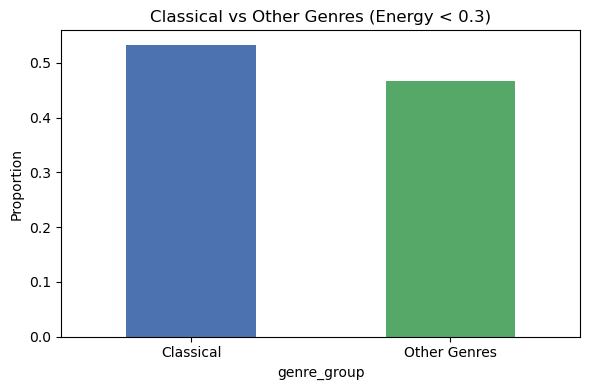

In [14]:
# Genre breakdown for low-energy songs (energy < 0.3)
low_energy = dataset_clean[dataset_clean['energy'] < 0.3].copy()
low_energy['genre_group'] = low_energy['music_genre'].apply(lambda x: 'Classical' if x == 'Classical' else 'Other Genres')

# Plot the genre group counts
genre_counts = low_energy['genre_group'].value_counts(normalize=True)

plt.figure(figsize=(6, 4))
genre_counts.plot(kind='bar', color=['#4C72B0', '#55A868'])
plt.title('Classical vs Other Genres (Energy < 0.3)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The bar plot comparing Classical music to all other genres among songs with energy below 0.3 reveals that Classical alone accounts for over 50% of low-energy tracks, while all other genres combined make up less than half. This strong concentration underscores Classical music’s intrinsic association with low-energy characteristics such as soft dynamics, slower tempo, and acoustic instrumentation. The insight is significant not just musically, but also for practical applications: in mood-based recommendation systems or playlist generation, Classical emerges as the most statistically reliable genre for calm and relaxing audio content. Moreover, this genre skew highlights the potential value of using genre–energy interactions as engineered features in predictive modeling, especially when classifying or recommending songs based on audio profiles.

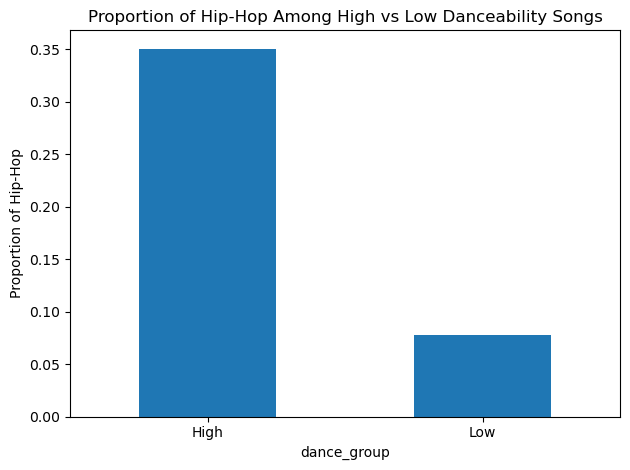

In [16]:
# Is Hip-Hop more likely to be high-danceability compared to other genres?
# Create binary column: high or low danceability
dataset_clean['dance_group'] = dataset_clean['danceability'].apply(lambda x: 'High' if x > 0.8 else 'Low')

# Compare Hip-Hop vs Others in high-danceability
dance_pivot = pd.crosstab(dataset_clean['dance_group'], dataset_clean['music_genre'], normalize='index')
dance_pivot[['Hip-Hop']].plot(kind='bar', legend=False)
plt.title('Proportion of Hip-Hop Among High vs Low Danceability Songs')
plt.ylabel('Proportion of Hip-Hop')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This plot reveals a strong association between the Hip-Hop genre and high danceability. Among songs with a danceability score above 0.8, Hip-Hop accounts for approximately 35% of the tracks, while it represents only around 7% among low-danceability songs. This sharp contrast indicates that Hip-Hop is structurally optimized for movement and rhythm, often featuring steady beats and engaging tempos. This insight can directly inform the design of music recommendation algorithms or playlist curation engines — for example, if a user seeks high-danceability tracks (e.g., for a party or workout), the system can prioritize Hip-Hop tracks with high confidence. Additionally, it supports the idea of including genre–feature interaction terms (e.g., danceability × genre) when building predictive models for genre classification or music mood tagging.

/var/folders/wl/g14c18_56y79lbqg8zfzfgpm0000gn/T/ipykernel_14834/1021446244.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_speech['genre_group'] = high_speech['music_genre'].apply(lambda x: top_genre if x == top_genre else 'Other Genres')


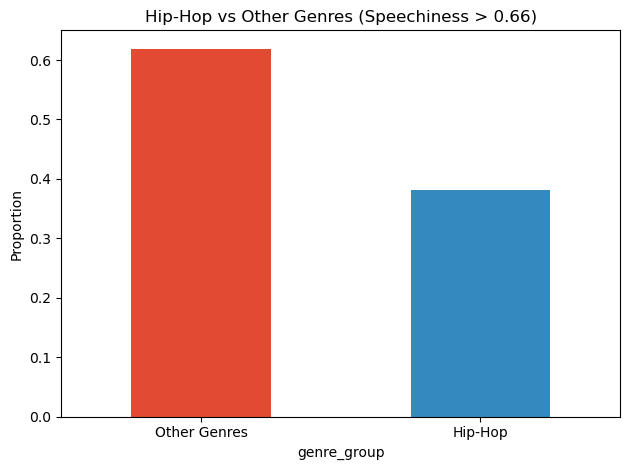

In [17]:
# Define speechiness threshold for spoken-word content
dataset_clean['speech_group'] = dataset_clean['speechiness'].apply(lambda x: 'High' if x > 0.66 else 'Low')

# Compare genre distribution among high speechiness
high_speech = dataset_clean[dataset_clean['speech_group'] == 'High']
top_genre = high_speech['music_genre'].value_counts().idxmax()

# Create comparison group: Top genre vs Others
high_speech['genre_group'] = high_speech['music_genre'].apply(lambda x: top_genre if x == top_genre else 'Other Genres')

# Plot
group_counts = high_speech['genre_group'].value_counts(normalize=True)
group_counts.plot(kind='bar', color=['#E24A33', '#348ABD'])
plt.title(f'{top_genre} vs Other Genres (Speechiness > 0.66)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This plot focuses on songs with high speechiness (speechiness > 0.66), a range typically associated with spoken-word content such as rapping or dialogue. Among these tracks, Hip-Hop dominates, comprising the majority of songs in this segment. This sharp concentration illustrates that Hip-Hop is uniquely characterized by high vocal presence and rhythmic speech, distinguishing it from more instrumentally focused genres. This insight can guide genre classification efforts and speech-related audio tagging — for instance, a track with high speechiness is much more likely to be Hip-Hop, and this pattern can be used to improve automated genre prediction, voice activity detection, or even assist music platforms in flagging podcast-like content in song databases.